# Доверительные интервали для оценки среднего

## Построение доверительного интервала для среднего (z-test, t-test)

In [ ]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic


In [ ]:
#построение 95% доверительного интервала
_zconfint_generic(mean, std_mean, alpha, alternative)
_tconfint_generic(mean, std_mean, dof, alpha, alternative)

## Построение доверительного интервала для доли (z-test, t-test)

Доверительный интервал на основе нормального распределения
$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [5]:
from statsmodels.stats.proportion import proportion_confint

In [ ]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

Доверительный интервал Уилсона (используется при малом размере выборки или малой доле 1)
$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [ ]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

Размер выборки для интервала заданной ширины

In [ ]:
from statsmodels.stats.proportion import samplesize_confint_proportion
#statsmodels.stats.proportion.samplesize_confint_proportion(proportion, half_length, alpha=0.05, method='normal')
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))

## Построение доверительного интервала для двух долей

In [9]:
import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал для разности долей (независимые выборки)

   | $X_1$ | $X_2$  
  ------------- | -------------|
  1  | a | b 
  0  | c | d 
  $\sum$ | $n_1$| $n_2$
  
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

In [16]:
# Фyнкция для расчета интервала для разности долей
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [ ]:
# Вызов метода
proportions_confint_diff_ind(sample1, sample2)

### Доверительный интервал для разности долей (связанные выборки)

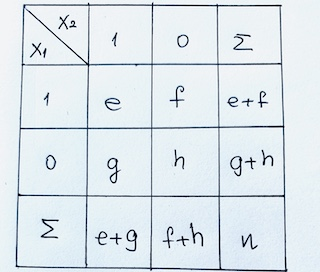

In [7]:
from IPython.display import Image
Image("IMG_4070.JPG")

$$ \hat{p}_1 = \frac{e + f}{n}$$

$$ \hat{p}_2 = \frac{e + g}{n}$$

$$ \hat{p}_1 - \hat{p}_2 = \frac{f - g}{n}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

In [17]:
# Фyнкция для расчета интервала для разности долей
def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [ ]:
# Вызов метода
proportions_confint_diff_rel(sample1, sample2, alpha = 0.05)

### Биномиальный критерий для доли

In [ ]:
#scipy.stats.binom_test(x, n=None, p=0.5, alternative='two-sided')
#Perform a test that the probability of success is p.
stats.binom_test(12, 16, 0.5, alternative = 'two-sided')

### Критерий согласия Пирсона ( $\chi^2$)


Критерий Пирсона проверяет выборку на принадлежность тому или иному распределению

In [ ]:
#scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)
#The chi-square test tests the null hypothesis that the categorical data has the given frequencies.
stats.chisquare(observed_frequences, expected_frequences, ddof = 1)

### Критерий Шапиро-Уилка

Критерий проверяет выборку на принадлежность нормальному распределению

In [ ]:
#Perform the Shapiro-Wilk test for normality.
stats.shapiro(data.Placebo)

# Критерии Стьюдента

In [1]:
import scipy
from statsmodels.stats.weightstats import *

## Одновыборочный критерий Стьюдента

In [ ]:
#scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate')
#Calculate the T-test for the mean of ONE group of scores
stats.ttest_1samp(data.Placebo, 50.0)

In [ ]:
#95%% confidence interval
print("95%% confidence interval: [%f, %f]" % zconfint(data.Placebo))

## Двухвыборочный критерий Стьюдента (независимые выборки)

In [ ]:
# QQ-plot
stats.probplot(data.Placebo, dist="norm", plot=pylab)

In [ ]:
#scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
#Calculate the T-test for the means of two independent samples of scores.
scipy.stats.ttest_ind(data.Placebo, data.Methylphenidate, equal_var = False)

In [ ]:
#Интервальная оценка разности средних
cm = CompareMeans(DescrStatsW(data.Methylphenidate), DescrStatsW(data.Placebo))
print("95%% confidence interval: [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

## Двухвыборочный критерий Стьюдента (зависмые выборки)

In [ ]:
# QQ-plot для попарных разностей
stats.probplot(data.Placebo - data.Methylphenidate, dist = "norm", plot = pylab)
pylab.show()

In [ ]:
# Критерий Шапиро-Уилка для попарных разностей
stats.shapiro(data.Methylphenidate - data.Placebo)

In [ ]:
# scipy.stats.ttest_rel(a, b, axis=0)
#Calculates the T-test on TWO RELATED samples of scores, a and b.
stats.ttest_rel(data.Methylphenidate, data.Placebo)

In [ ]:
#95%% confidence interval
DescrStatsW(data.Methylphenidate - data.Placebo).tconfint_mean()

## Z-критерий для двух долей 

In [ ]:
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

### Z-критерий для разности долей (независимые выборки)

   | $X_1$ | $X_2$  
  ------------- | -------------|
  1  | a | b 
  0  | c | d 
  $\sum$ | $n_1$| $n_2$
  
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

$$Z-статистика: Z({X_1, X_2}) =  \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1 - P)(\frac{1}{n_1} + \frac{1}{n_2})}}$$
$$P = \frac{\hat{p}_1{n_1} + \hat{p}_2{n_2}}{{n_1} + {n_2}} $$

In [ ]:
# построение доверительного интервала
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [ ]:
# вычисление z-статистики для 2 выборок
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [ ]:
#  функция для расчета p-value для разности долей
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

## Z-критерий для разности долей (связанные выборки)

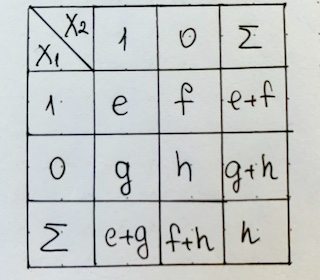

In [6]:
from IPython.display import Image
Image("IMG_3147.JPG")

$$ \hat{p}_1 = \frac{e + f}{n}$$

$$ \hat{p}_2 = \frac{e + g}{n}$$

$$ \hat{p}_1 - \hat{p}_2 = \frac{f - g}{n}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

$$Z-статистика: Z({X_1, X_2}) = \frac{f - g}{\sqrt{f + g - \frac{(f-g)^2}{n}}}$$

In [ ]:
# построение доверительного интервала
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [ ]:
# вычисление z-статистики для 2  зависимых выборок
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [ ]:
# p-value
print("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_rel(data.banner_a, data.banner_b)))

# Непараметрические криетрии

## Одновыборочные критерии

### Критерий знаков

$H_0\colon$ медиана доли времени, проведенного в клетке с зеркалом, равна 0.5

$H_1\colon$ медиана доли времени, проведенного в клетке с зеркалом, не равна 0.5

In [ ]:
 sign_test(mouses_data, 0.5)

### Критерий знаковых рангов Вилкоксона

In [ ]:
m0 = 0.5
stats.wilcoxon(mouses_data.proportion_of_time - m0)

### Перестановочный критерий

$H_0\colon$ среднее равно 0.5

$H_1\colon$ среднее не равно 0.5

In [ ]:
# T - статистика
def permutation_t_stat_1sample(sample, mean):
    t_stat = sum(list(map(lambda x: x - mean, sample)))
    return t_stat

In [ ]:
# Нулевое распределение
def permutation_zero_distr_1sample(sample, mean, max_permutations = None):
    centered_sample = list(map(lambda x: x - mean, sample))
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        signs_array =  itertools.product([-1, 1], repeat = len(sample))
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

In [ ]:
#Реализация критерия
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [ ]:
# без перестановок
permutation_test(mouses_data.proportion_of_time, 0.5)

In [ ]:
# максимум 10000 перестановок
permutation_test(mouses_data.proportion_of_time, 0.5, 10000)

## Двухвыборочные критерии для связных выборок

$H_0\colon$ медианы веса до и после терапии совпадает

$H_1\colon$ медианы веса до и после тепрапии отличаются

### Критерий знаков

$H_0\colon P\left(X_1>X_2\right)=\frac1{2},$

$H_1\colon P\left(X_1>X_2\right)\neq\frac1{2}$

In [ ]:
sign_test(weight_data.After - weight_data.Before)

### Критерий знаковых рангов Уилкоксона

$H_0\colon med\left(X_1-X_2\right)=0,$

$H_1\colon med\left(X_1-X_2\right)\neq0$

In [ ]:
# Можно передавать 2 выборки - результат одинаковый
stats.wilcoxon(weight_data.After, weight_data.Before)

In [ ]:
# Можно передавать разность выборок - результат одинаковый
stats.wilcoxon(weight_data.After - weight_data.Before)

### Перестановочный критерий

$H_0\colon \mathbb{E}(X_1 - X_2) = 0$

$H_1\colon \mathbb{E}(X_1 - X_2) \neq 0$

In [ ]:
# T - статистика
def permutation_t_stat_1sample(sample, mean):
    t_stat = sum(list(map(lambda x: x - mean, sample)))
    return t_stat

# Нулевое распределение
def permutation_zero_distr_1sample(sample, mean, max_permutations = None):
    centered_sample = list(map(lambda x: x - mean, sample))
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        signs_array =  itertools.product([-1, 1], repeat = len(sample))
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

#Реализация критерия
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [ ]:
permutation_test(weight_data.After - weight_data.Before, 0., max_permutations = 50000)

## Двухвыборочные критерии для независимых выборок

### Ранговый критерий Манна-Уитни

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [ ]:
stats.mannwhitneyu(price2001, price2002)

### Перестановочный критерий

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [ ]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), list(filter(lambda i: i not in index, range(n)))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)
    


In [ ]:
permutation_test(price2001, price2002, max_permutations = 10000)

## Корреляция Пирсона

In [ ]:
# сделать таблицу плоской для вычисления корреляции
df = pd.pivot_table(sales, values='sales', index=['date', 'store_id'], columns=['product_name'], fill_value = 0)
df.corr()

# Множественная проверка гипотез

In [ ]:

from statsmodels.sandbox.stats.multicomp import multipletests 

## Поправка на множественную проверку

### Метод Холма

In [ ]:
reject, p_corrected, a1, a2 = multipletests(sales_correlation.p, 
                                            alpha = 0.05, 
                                            method = 'holm') 

### Метод Бенджамини-Хохберга

In [ ]:
reject, p_corrected, a1, a2 = multipletests(sales_correlation.p, 
                                            alpha = 0.05, 
                                            method = 'fdr_bh') 